Read in files

In [1]:
import os

reviews_path = "../data/Database/"

files = [ reviews_path + i for i in os.listdir(reviews_path) if i.endswith("csv")]
print(files)

['../data/Database/accounting.csv', '../data/Database/automotive.csv', '../data/Database/computer_software.csv', '../data/Database/construction.csv', '../data/Database/education_management.csv', '../data/Database/financial.csv', '../data/Database/higher_ed.csv', '../data/Database/hospital_care.csv', '../data/Database/IT_services.csv']


In [2]:
import pandas as pd

li = []

#Loading in first 2 files
for f in files[:2]:
    data = pd.read_csv(f)
    li.append(data)
    
reviews = pd.concat(li, axis=0, ignore_index=True)
print(reviews.shape)
display( reviews )

(237279, 13)


,Unnamed: 0,company_name,review_title,job_title,employee_status,location,date,review,pros,cons,rating,yes_helpful,no_helpful
0,0,EY,Wonderful place to work,Senior Executive Assistant,Former Employee,"Houston, TX",2020-03-19,This company goes above and beyond to provide ...,NaN,NaN,4.0,0,0
1,1,EY,People First,Senior Business Analyst,Former Employee,"New York, NY",2020-04-04,A place where you definitely will learn about ...,NaN,NaN,5.0,0,0
2,2,EY,I Enjoyed My Short Stay At EY!,Program Analyst,Former Employee,"Alpharetta, GA",2020-04-04,"This company wasn't perfect, but it's about as...","I love Work Life Balance! Also, they treat you...",Politics,4.0,0,0
3,3,EY,"Fun workplace, supportive team",Consultant,Former Employee,"Gurgaon, Haryana",2020-04-03,I have been appointed for busy season so we ha...,"Cab facilities, Flexibility for WFH, Supportiv...",team unity,4.0,0,0
4,4,EY,Great company to work for,Executive Assistant,Former Employee,"Canary Wharf, Greater London",2020-04-01,I wish I never resigned from EY - my massive m...,NaN,NaN,5.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237274,181445,NTB - National Tire & Battery,Good company needs better leadership and work ...,General Service Tech,Former Employee,Roanoke VA,2012-01-23,Overall the job is good the company as a whole...,scheduling,"management, pay/benifits",3.0,3,3
237275,181446,NTB - National Tire & Battery,Good discounts but technicians need to care a ...,"Stanley, Ks",Former Employee,Sales Associate,2011-11-05,With better management and more caring employe...,"discounts on tires, auto parts, and labor",starting pay and attitude of technicians,2.0,0,0
237276,181447,NTB - National Tire & Battery,ambiente comodo de trabajo,Back Office,Former Employee,"Microcentro, Buenos Aires",2019-01-30,ambiente comodo para trabajar pero sin posibil...,en blanco,no hay posibilidad de crecimiento,5.0,0,1
237277,181448,NTB - National Tire & Battery,Arbetsmiljö,Arbetare,Former Employee,Stockholm,2019-01-20,Det är en bra företag som ger dig god erfarenh...,NaN,NaN,3.0,0,1


Let's clean up the job titles

In [3]:
job_titles = reviews.job_title.tolist()

job_titles = list( set(job_titles) )

# Remove nan
job_titles.pop(0)

print("Total Job Titles", len(job_titles))
print(job_titles[:6])

Total Job Titles 78626
['Application Support Engineer - Level 3', 'Consultor de serviços/ encarregado de obras', 'Associate - Impostos Indiretos', 'Stagista', 'FP&A - Financial and Planning Analyst', 'SharePoint /Web Developer']


In [4]:
import string
import re

replacement_words = {
    "it":"Technology"
    ,"sr":"Senior"
    ,"qa":"Quality"
}

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
def cleanTitle(title):
    title = title.translate(translator)
    title = re.sub(' +', ' ',title)
    title = title.lower()
    for key, value in replacement_words.items():
        title = title.replace(key,value)
    return title

clean_job_titles = list( map(cleanTitle, job_titles ) )

display( clean_job_titles[:20] )

['application support engineer level 3',
 'consultor de serviços encarregado de obras',
 'associate impostos indiretos',
 'stagista',
 'fp a financial and planning analyst',
 'sharepoint web developer',
 'area rep',
 'ekspert ds cykli i metodologii produkcji',
 'Senior automation engineer',
 'toyota master diagnostic technician',
 'delivery and colection cars driver',
 'tend cure press operator',
 'directeur de sTechnologye industriel',
 'tax technical compliance consultant',
 'auto set up and job leader',
 'senior systems archTechnologyect assistant director',
 'aumoxarife 2',
 'a combinar',
 'construction manager',
 'uh 60 helicopter mechanic']

In [5]:
import spacy

nlp = spacy.load("en_core_web_md")

In [6]:
import numpy as np

X = np.zeros((len(clean_job_titles),300))

for i, title in enumerate(clean_job_titles):
    X[i] = nlp.tokenizer(title).vector


print(X.shape)

(78626, 300)


Visualize the data with PCA

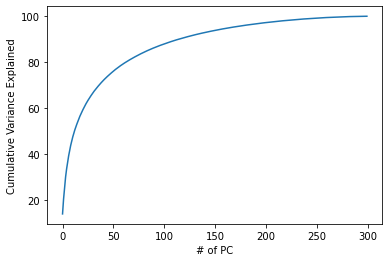

40% of variance explained by 7 principal conponents
60% of variance explained by 21 principal conponents
80% of variance explained by 63 principal conponents
95% of variance explained by 164 principal conponents
99% of variance explained by 244 principal conponents


In [7]:
import pickle
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

filename = "../models/section-2-job-titles-pca.pckl"
config = Path(filename)
if not config.is_file():
    pca = PCA(n_components=X.shape[1])
    pca_data = pca.fit(X)
    pickle.dump(pca, open(filename, 'wb'))
else:
    pca = pickle.load(open(filename, 'rb'))

pca_data = pca.transform(X)

# pca_expl_var = pca.explained_variance_ratio_
pca_sum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4 ) * 100 )
plt.plot(pca_sum)
plt.xlabel('# of PC')
plt.ylabel('Cumulative Variance Explained')
plt.show()

print( "40% of variance explained by {0} principal conponents".format(sum(pca_sum <= 40)) )
print( "60% of variance explained by {0} principal conponents".format(sum(pca_sum <= 60)) )
print( "80% of variance explained by {0} principal conponents".format(sum(pca_sum <= 80)) )
print( "95% of variance explained by {0} principal conponents".format(sum(pca_sum <= 95)) )
print( "99% of variance explained by {0} principal conponents".format(sum(pca_sum <= 99)) )

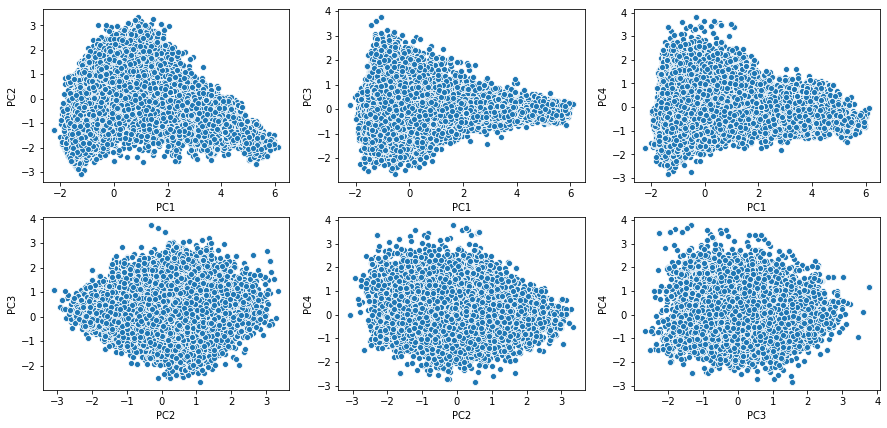

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


df_pca_top_ten = pd.DataFrame(pca_data[:,:10])
df_pca_top_ten.columns = ['PC1','PC2', 'PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9','PC10']

fig, ax =plt.subplots(2,3,figsize=(15,7))
pc1_pc2 = sns.scatterplot(x="PC1", y="PC2", data=df_pca_top_ten, ax=ax[0,0])
pc1_pc3 = sns.scatterplot(x="PC1", y="PC3", data=df_pca_top_ten, ax=ax[0,1])
pc1_pc4 = sns.scatterplot(x="PC1", y="PC4", data=df_pca_top_ten, ax=ax[0,2])
pc2_pc3 = sns.scatterplot(x="PC2", y="PC3", data=df_pca_top_ten, ax=ax[1,0])
pc2_pc4 = sns.scatterplot(x="PC2", y="PC4", data=df_pca_top_ten, ax=ax[1,1])
pc3_pc4 = sns.scatterplot(x="PC3", y="PC4", data=df_pca_top_ten, ax=ax[1,2])

What the heck are we looking at?  Let's try to cluster it

In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
K = range(1,20)
for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=76244)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans_model.cluster_centers_, "euclidean"), axis=1)) / X.shape[0])

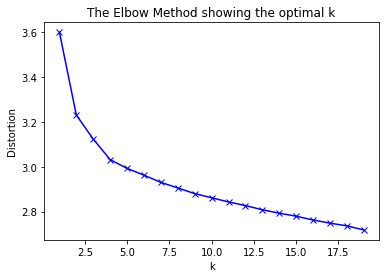

In [10]:
import matplotlib.pyplot as plt

plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal k")
plt.show()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

k=8
kmeans_model = KMeans(n_clusters=k, random_state=76244)
labels = kmeans_model.fit_predict(X)

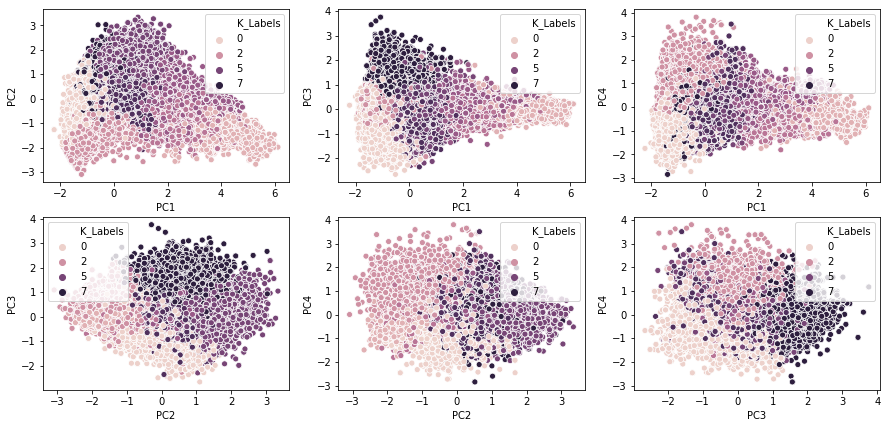

In [12]:
df_pca_top_ten["K_Labels"] = labels

fig, ax =plt.subplots(2,3,figsize=(15,7))
pc1_pc2 = sns.scatterplot(x="PC1", y="PC2", hue="K_Labels", data=df_pca_top_ten, ax=ax[0,0])
pc1_pc3 = sns.scatterplot(x="PC1", y="PC3", hue="K_Labels", data=df_pca_top_ten, ax=ax[0,1])
pc1_pc4 = sns.scatterplot(x="PC1", y="PC4", hue="K_Labels", data=df_pca_top_ten, ax=ax[0,2])
pc2_pc3 = sns.scatterplot(x="PC2", y="PC3", hue="K_Labels", data=df_pca_top_ten, ax=ax[1,0])
pc2_pc4 = sns.scatterplot(x="PC2", y="PC4", hue="K_Labels", data=df_pca_top_ten, ax=ax[1,1])
pc3_pc4 = sns.scatterplot(x="PC3", y="PC4", hue="K_Labels", data=df_pca_top_ten, ax=ax[1,2])